FM ASSIGNMENT

## Sujay Nigam 2019B3AA1267H



In [3]:
#Install required libraries
!pip install yfinance
import matplotlib.pyplot as plt
import statsmodels.api as sm
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.diagnostic import het_white
# warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


# Finding WACC for arbitary company

In [4]:
#Download stock prices for the security monthly data last 5 years
infy_df = yf.download('INFY.NS', 
                      start='2017-04-06', 
                      end='2022-04-06', 
                      progress=False,interval ='1mo'
)
infy_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-01,459.475006,500.000000,457.549988,488.524994,418.195648,122586584.0
2017-06-01,484.649994,494.450012,460.500000,467.774994,400.432770,157335112.0
2017-07-01,470.549988,510.850006,466.524994,505.600006,439.446564,168735660.0
2017-08-01,505.500000,514.625000,430.000000,457.475006,397.618317,582373864.0
2017-09-01,457.975006,462.950012,436.825012,449.950012,391.077820,212424430.0


In [5]:
#Download Market index closing prices
nifty_df = yf.download('^BSESN',start='2017-04-06', 
                      end='2022-04-06', 
                      progress=False,interval ='1mo',
)
nifty_df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-05-01,30021.490234,31255.279297,29804.119141,31145.800781,31145.800781,282400
2017-06-01,31117.089844,31522.869141,30680.660156,30921.609375,30921.609375,329400
2017-07-01,31156.039062,32672.660156,31017.109375,32514.939453,32514.939453,258300
2017-08-01,32579.800781,32686.480469,31128.019531,31730.490234,31730.490234,241300
2017-09-01,31769.339844,32524.109375,31081.830078,31283.720703,31283.720703,233900


In [6]:
#Calculate Log returns
nifty_df['Return_NIFTY'] = np.log(nifty_df['Adj Close']/nifty_df['Adj Close'].shift(1))
print(nifty_df['Return_NIFTY']) 

Date
2017-05-01         NaN
2017-06-01   -0.007224
2017-07-01    0.050244
2017-08-01   -0.024422
2017-09-01   -0.014180
2017-10-01    0.059847
2017-11-01   -0.001922
2017-12-01    0.027007
2018-01-01    0.054516
2018-02-01   -0.050788
2018-03-01   -0.036201
2018-04-01    0.064361
2018-05-01    0.004597
2018-06-01    0.002858
2018-07-01    0.059804
2018-08-01    0.027240
2018-09-01   -0.064611
2018-10-01   -0.050530
2018-11-01    0.049623
2018-12-01   -0.003487
2019-01-01    0.005209
2019-02-01   -0.010794
2019-03-01    0.075309
2019-04-01    0.009231
2019-05-01    0.017338
2019-06-01   -0.008079
2019-07-01   -0.049792
2019-08-01   -0.003965
2019-09-01    0.035123
2019-10-01    0.037106
2019-11-01    0.016430
2019-12-01    0.011211
2020-01-01   -0.012937
2020-02-01   -0.061426
2020-03-01   -0.262058
2020-04-01    0.134699
2020-05-01   -0.039119
2020-06-01    0.074038
2020-07-01    0.074248
2020-08-01    0.026798
2020-09-01   -0.014613
2020-10-01    0.039812
2020-11-01    0.108402
2020-1

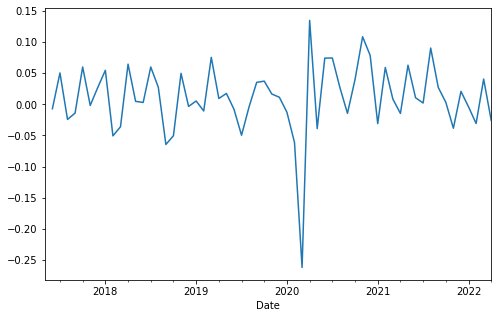

In [7]:
nifty_df['Return_NIFTY'].plot(figsize=(8,5))
plt.show()

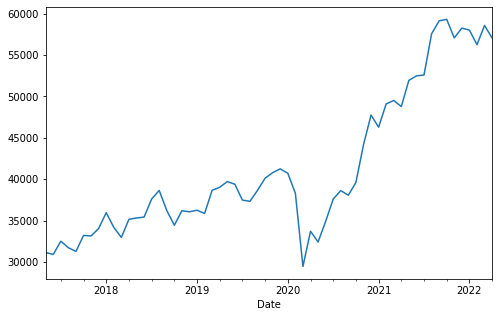

In [8]:
nifty_df['Adj Close'].plot(figsize=(8,5))
plt.show()

In [9]:
nifty_df1 = nifty_df.dropna(axis=0)
nifty_df1.head()

,Open,High,Low,Close,Adj Close,Volume,Return_NIFTY
Date,,,,,,,
2017-06-01,31117.089844,31522.869141,30680.660156,30921.609375,30921.609375,329400,-0.007224
2017-07-01,31156.039062,32672.660156,31017.109375,32514.939453,32514.939453,258300,0.050244
2017-08-01,32579.800781,32686.480469,31128.019531,31730.490234,31730.490234,241300,-0.024422
2017-09-01,31769.339844,32524.109375,31081.830078,31283.720703,31283.720703,233900,-0.014180
2017-10-01,31537.810547,33340.171875,31440.480469,33213.128906,33213.128906,209400,0.059847


In [10]:
#Caclulate log returns
infy_df['Return_INFY'] = np.log(infy_df['Adj Close']/infy_df['Adj Close'].shift(1))
print(infy_df['Return_INFY']) 

Date
2017-05-01         NaN
2017-06-01   -0.043403
2017-07-01    0.092970
2017-08-01   -0.100024
2017-09-01   -0.016586
2017-10-01    0.024099
2017-11-01    0.071048
2017-12-01    0.065380
2018-01-01    0.098789
2018-02-01    0.019244
2018-03-01   -0.035414
2018-04-01    0.058095
2018-05-01    0.026572
2018-06-01    0.059411
2018-07-01    0.051216
2018-08-01    0.054179
2018-09-01    0.013098
2018-10-01   -0.061653
2018-11-01   -0.017165
2018-12-01   -0.012817
2019-01-01    0.128825
2019-02-01   -0.015073
2019-03-01    0.012922
2019-04-01    0.010032
2019-05-01   -0.018266
2019-06-01   -0.007825
2019-07-01    0.094889
2019-08-01    0.026423
2019-09-01   -0.011416
2019-10-01   -0.161355
2019-11-01    0.038540
2019-12-01    0.048766
2020-01-01    0.059470
2020-02-01   -0.058717
2020-03-01   -0.131562
2020-04-01    0.109172
2020-05-01   -0.034842
2020-06-01    0.076543
2020-07-01    0.272002
2020-08-01   -0.039486
2020-09-01    0.082293
2020-10-01    0.050619
2020-11-01    0.047161
2020-1

In [11]:
infy_df1 = infy_df.dropna(axis=0)
infy_df1.head()

,Open,High,Low,Close,Adj Close,Volume,Return_INFY
Date,,,,,,,
2017-06-01,484.649994,494.450012,460.500000,467.774994,400.432770,157335112.0,-0.043403
2017-07-01,470.549988,510.850006,466.524994,505.600006,439.446564,168735660.0,0.092970
2017-08-01,505.500000,514.625000,430.000000,457.475006,397.618317,582373864.0,-0.100024
2017-09-01,457.975006,462.950012,436.825012,449.950012,391.077820,212424430.0,-0.016586
2017-10-01,449.950012,478.850006,448.575012,460.924988,400.616852,183699102.0,0.024099


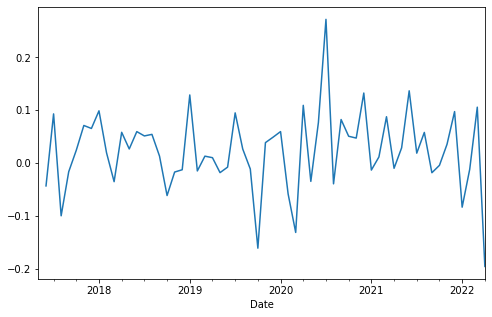

In [12]:
infy_df['Return_INFY'].plot(figsize=(8,5))
plt.show()

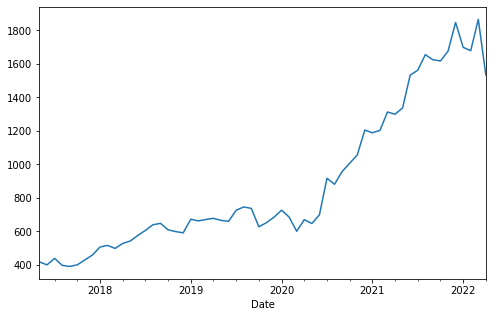

In [13]:
infy_df['Adj Close'].plot(figsize=(8,5))
plt.show()

In [14]:
infy_df1_returns = infy_df1['Return_INFY']
infy_df1_returns.head()


Date
2017-06-01   -0.043403
2017-07-01    0.092970
2017-08-01   -0.100024
2017-09-01   -0.016586
2017-10-01    0.024099
Name: Return_INFY, dtype: float64

In [15]:
nifty_df1_returns = nifty_df1['Return_NIFTY']
nifty_df1_returns.head()

Date
2017-06-01   -0.007224
2017-07-01    0.050244
2017-08-01   -0.024422
2017-09-01   -0.014180
2017-10-01    0.059847
Name: Return_NIFTY, dtype: float64

In [16]:
returns = pd.merge(nifty_df1_returns,infy_df1_returns,how='inner',on='Date')
returns.head()
returns.describe()

,Return_NIFTY,Return_INFY
count,59.000000,59.000000
mean,0.010262,0.022032
std,0.056379,0.076031
min,-0.262058,-0.195939
25%,-0.014396,-0.015830
50%,0.008299,0.024099
75%,0.045031,0.062425
max,0.134699,0.272002


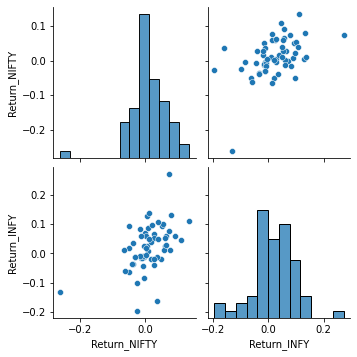

In [17]:
sns.pairplot(returns)
plt.show()

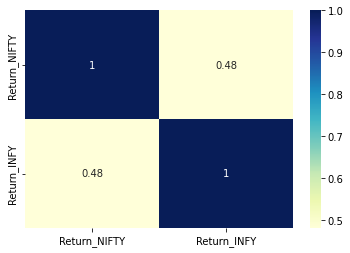

In [18]:
sns.heatmap(returns.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [19]:
x = returns['Return_NIFTY']
y = returns['Return_INFY']
x_sm = sm.add_constant(x)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


##Assumptions of OLS regression
###A linear relationship between the dependent and independent variables - The linear regression model is linear in parameters
##The independent variables are not highly correlated with each other - no multicollinearity
##The variance of the residuals is constant - no heteroskedasticity
##Random sampling of observation and no autocorrelation
##Assumption of Normality of Errors

##Ri = αi + βi(RM) + εi.........Market model

• Ri = Return of security i

• αi = The return from the asset that is not related to the market’s return. This is “alpha” return from the security

• βi = Beta or the return from the security explained by the market index’s return

• RM = The market index’s return

• εi = Error term for past returns not explained by the regression equation

In [20]:
#Regression - Market model 
model = sm.OLS(y,x_sm)

##OLS estimation or Ordinary Least square Minimizes the sum of squared errors

In [21]:
results = model.fit()

In [22]:
#Regression result
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Return_INFY   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     17.28
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           0.000110
Time:                        15:28:40   Log-Likelihood:                 76.617
No. Observations:                  59   AIC:                            -149.2
Df Residuals:                      57   BIC:                            -145.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0154      0.009      1.727      0.090      -0.002       0.033
Return_NIFTY     0.6504      0.156      4.156      0.000       0.337       0.964
==============================================================================
Omnibus:                        7.254   Durbin-Watson:                   2.125
Prob(Omnibus):                  0.027   Jarque-Bera (JB):               12.337
Skew:                          -0.190   Prob(JB):                      0.00209
Kurtosis:                       5.208   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
beta = results.params[1]

##Beta for Infosys stock = 0.679 and significant at 5%


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 59 entries, 2017-06-01 to 2022-04-01
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Return_NIFTY  59 non-null     float64
 1   Return_INFY   59 non-null     float64
dtypes: float64(2)
memory usage: 1.4 KB


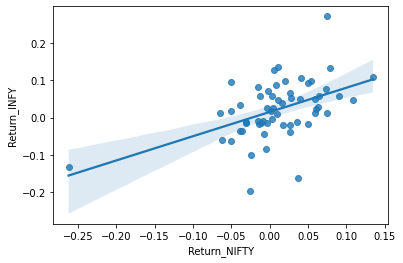

In [24]:
#Regression - Security Characteristic line
returns.info()
sns.regplot(x = 'Return_NIFTY', y = 'Return_INFY', data = returns)

In [25]:
print('resid', results.resid)

resid Date
2017-06-01   -0.054063
2017-07-01    0.044933
2017-08-01   -0.099498
2017-09-01   -0.022722
2017-10-01   -0.030184
2017-11-01    0.056940
2017-12-01    0.032457
2018-01-01    0.047974
2018-02-01    0.036918
2018-03-01   -0.027228
2018-04-01    0.000877
2018-05-01    0.008223
2018-06-01    0.042194
2018-07-01   -0.003039
2018-08-01    0.021104
2018-09-01    0.039762
2018-10-01   -0.044146
2018-11-01   -0.064798
2018-12-01   -0.025907
2019-01-01    0.110079
2019-02-01   -0.023411
2019-03-01   -0.051417
2019-04-01   -0.011330
2019-05-01   -0.044901
2019-06-01   -0.017929
2019-07-01    0.111916
2019-08-01    0.013643
2019-09-01   -0.049618
2019-10-01   -0.200847
2019-11-01    0.012496
2019-12-01    0.026116
2020-01-01    0.052525
2020-02-01   -0.034125
2020-03-01    0.023520
2020-04-01    0.006207
2020-05-01   -0.024758
2020-06-01    0.013031
2020-07-01    0.208353
2020-08-01   -0.072273
2020-09-01    0.076439
2020-10-01    0.009367
2020-11-01   -0.038702
2020-12-01    0.066100


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    5.900000e+01
mean     6.586069e-18
std      6.660477e-02
min     -2.008466e-01
25%     -3.215430e-02
50%     -3.038800e-03
75%      4.097786e-02
max      2.083531e-01
dtype: float64

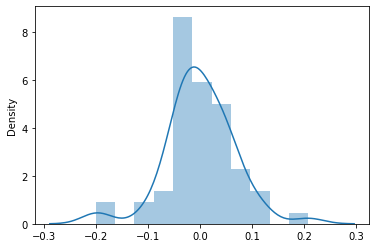

In [26]:
#Histogram of residuals
sns.distplot(results.resid)
results.resid.describe()

In [27]:
#Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
#perform White's test
from statsmodels.stats.diagnostic import het_white
white_test = het_white(results.resid,  results.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))


{'Test Statistic': 0.2825919514556703, 'Test Statistic p-value': 0.8682322979783087, 'F-Statistic': 0.13475687881551315, 'F-Test p-value': 0.87421088939573}


##The errors are homoskedastic as per the White test


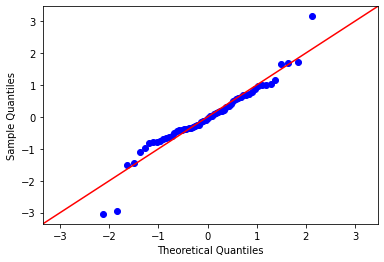

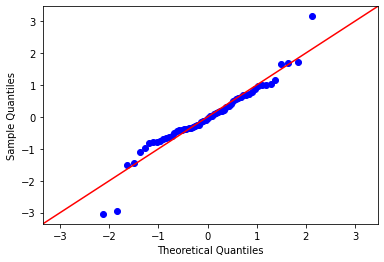

In [28]:
#Testing for Normality of errors (Assumption requirement of linear regression)
sm.qqplot(results.resid,line='45',fit=True,dist=stats.norm)

In [29]:
stats.normaltest(results.resid)

NormaltestResult(statistic=7.25375092171566, pvalue=0.02659916483526616)

We can see that since we are plotting the data with the theoretical quantiles of a normal distribution, we are getting almost a straight line, though some points are not exactly on the line.
The D’Agostino’s K-squared test result suggests that the null hypothesis that the distribution is normal cannot be rejected at 1% significance level. 

In [30]:
R_m = nifty_df["Adj Close"].mean()

In [31]:
nifty_df["R_m"] = (nifty_df['Adj Close'] - nifty_df['Adj Close'].shift(12))/nifty_df['Adj Close'].shift(12)

In [32]:
ans = nifty_df["R_m"].mean()

In [33]:
ans*100

15.96919898535675

In [34]:
RFR = pd.read_csv("rfr.csv")

In [35]:
RFR

,Date,Price,Open,High,Low,Change %
0,"Nov 17, 2022",7.281,7.250,7.292,7.243,0.10%
1,"Nov 16, 2022",7.274,7.272,7.288,7.254,0.18%
2,"Nov 15, 2022",7.261,7.295,7.299,7.258,-0.36%
3,"Nov 14, 2022",7.287,7.338,7.338,7.277,-0.27%
4,"Nov 11, 2022",7.307,7.272,7.308,7.235,-0.53%
5,"Nov 10, 2022",7.346,7.381,7.385,7.334,-0.56%
6,"Nov 09, 2022",7.387,7.425,7.425,7.381,-0.63%
7,"Nov 07, 2022",7.434,7.484,7.484,7.434,-0.47%
8,"Nov 04, 2022",7.469,7.497,7.497,7.457,-0.17%
9,"Nov 03, 2022",7.482,7.440,7.490,7.440,1.05%


In [36]:
rf = RFR["Price"].mean()

In [37]:
rf = rf / 100

In [38]:
Coe = rf + beta*(ans - rf)

In [39]:
Coe * 100


12.971899865018486

## Finding Cost of debt

In [40]:
EBIT = 975000
IE = 62000
ratio = EBIT / IE

In [41]:
ratio

15.725806451612904

INfosis is High market cap firm


In [42]:
Cod = rf + 0.75 / 100
Cod*100

8.145904761904763

Cost of debt = 8.14%


## Finding WACC

 Debt/Equity = 8.12 from yahoo finance

In [43]:
E_v = 1 / (8.12 + 1)
D_v = 1 - E_v

In [44]:
E_v, D_v

(0.10964912280701755, 0.8903508771929824)

Corporate Tax = 25%

In [45]:
WACC  = D_v * Cod * 0.75 + E_v * Coe
WACC * 100

6.861892529059046

# Making single function for whole process of finding WACC

In [46]:
def pipeline(company, ratio_E, D_E):
    infy_df = yf.download(company,
                          start='2017-04-06',
                          end='2022-04-06',
                          progress=False, interval='1mo'
                          )


    #Download Market index closing prices
    nifty_df = yf.download('^BSESN', start='2017-04-06',
                        end='2022-04-06',
                        progress=False, interval='1mo',
                        )

    nifty_df['Return_NIFTY'] = np.log(nifty_df['Adj Close']/nifty_df['Adj Close'].shift(1))


    print(nifty_df['Return_NIFTY'])

    nifty_df['Return_NIFTY'].plot(figsize=(8, 5))
    plt.show()

    nifty_df['Adj Close'].plot(figsize=(8, 5))
    plt.show()

    nifty_df1 = nifty_df.dropna(axis=0)


    #Caclulate log returns
    infy_df['Return_INFY'] = np.log(infy_df['Adj Close']/infy_df['Adj Close'].shift(1))
    print(infy_df['Return_INFY'])

    infy_df1 = infy_df.dropna(axis=0)
    infy_df['Return_INFY'].plot(figsize=(8, 5))
    plt.show()

    infy_df1_returns = infy_df1['Return_INFY']
    nifty_df1_returns = nifty_df1['Return_NIFTY']
    returns = pd.merge(nifty_df1_returns, infy_df1_returns,how='inner', on='Date')
    print(returns.describe())
    sns.pairplot(returns)
    plt.show()
    sns.heatmap(returns.corr(), annot=True, cmap="YlGnBu")
    plt.show()

    x = returns['Return_NIFTY']
    y = returns['Return_INFY']
    x_sm = sm.add_constant(x)

    #Regression - Market model
    model = sm.OLS(y, x_sm)
    results = model.fit()

    #Regression result
    
    print(results.summary())

    if results.f_pvalue > 0.5:
      return -1
    beta = results.params[1]
    returns.info()


    sns.regplot(x='Return_NIFTY', y='Return_INFY', data=returns)
    sns.distplot(results.resid)

    print(results.resid.describe())

    #Checking for Homoskedasticity of errors (Assumption requirement of linear regression)
    #perform White's test
    white_test = het_white(results.resid,  results.model.exog)

    #define labels to use for output of White's test
    labels = ['Test Statistic', 'Test Statistic p-value',
            'F-Statistic', 'F-Test p-value']

    #print results of White's test
    print(dict(zip(labels, white_test)))


    #Testing for Normality of errors (Assumption requirement of linear regression)
    sm.qqplot(results.resid,line='45',fit=True,dist=stats.norm)
    print(stats.normaltest(results.resid))
    print("this")
    nifty_df["R_m"] = (nifty_df['Adj Close'] - nifty_df['Adj Close'].shift(12))/nifty_df['Adj Close'].shift(12)
    ans = nifty_df["R_m"].mean()
    print("Market returns =", ans*100)

    RFR = pd.read_csv("rfr.csv")
    rf = RFR["Price"].mean()  # Risk free rate
    rf = rf / 100           
    print("rf =",rf)
    Coe = rf + beta*(ans - rf)   # coe= Cost of Equity
    print("Coe =", Coe * 100)
    EBIT = 975000
    IE = 62000
    Cod = rf + (ratio_E/100)   # cod = Cost of Debt
    print("Cod =", Cod*100)
    E_v = 1 / (D_E + 1)   # Equity/ Value 
    D_v = 1 - E_v   # Debt/ Value

    WACC = D_v * Cod * 0.75 + E_v * Coe
    print("Wacc =",WACC * 100)
    return WACC
        


Date
2017-05-01         NaN
2017-06-01   -0.007224
2017-07-01    0.050244
2017-08-01   -0.024422
2017-09-01   -0.014180
2017-10-01    0.059847
2017-11-01   -0.001922
2017-12-01    0.027007
2018-01-01    0.054516
2018-02-01   -0.050788
2018-03-01   -0.036201
2018-04-01    0.064361
2018-05-01    0.004597
2018-06-01    0.002858
2018-07-01    0.059804
2018-08-01    0.027240
2018-09-01   -0.064611
2018-10-01   -0.050530
2018-11-01    0.049623
2018-12-01   -0.003487
2019-01-01    0.005209
2019-02-01   -0.010794
2019-03-01    0.075309
2019-04-01    0.009231
2019-05-01    0.017338
2019-06-01   -0.008079
2019-07-01   -0.049792
2019-08-01   -0.003965
2019-09-01    0.035123
2019-10-01    0.037106
2019-11-01    0.016430
2019-12-01    0.011211
2020-01-01   -0.012937
2020-02-01   -0.061426
2020-03-01   -0.262058
2020-04-01    0.134699
2020-05-01   -0.039119
2020-06-01    0.074038
2020-07-01    0.074248
2020-08-01    0.026798
2020-09-01   -0.014613
2020-10-01    0.039812
2020-11-01    0.108402
2020-1

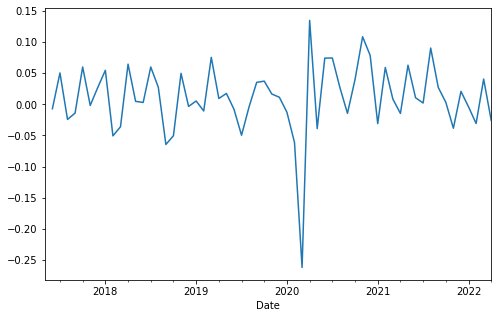

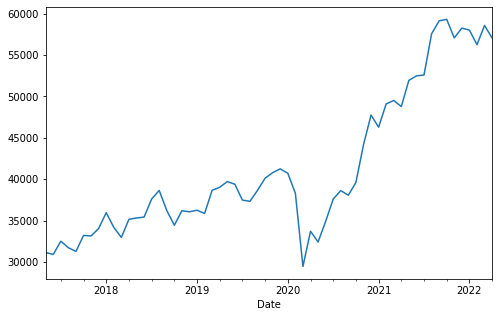

Date
2017-05-01         NaN
2017-06-01   -0.043403
2017-07-01    0.092970
2017-08-01   -0.100024
2017-09-01   -0.016586
2017-10-01    0.024099
2017-11-01    0.071048
2017-12-01    0.065380
2018-01-01    0.098789
2018-02-01    0.019244
2018-03-01   -0.035414
2018-04-01    0.058096
2018-05-01    0.026572
2018-06-01    0.059411
2018-07-01    0.051216
2018-08-01    0.054179
2018-09-01    0.013098
2018-10-01   -0.061653
2018-11-01   -0.017165
2018-12-01   -0.012817
2019-01-01    0.128825
2019-02-01   -0.015073
2019-03-01    0.012922
2019-04-01    0.010032
2019-05-01   -0.018267
2019-06-01   -0.007825
2019-07-01    0.094889
2019-08-01    0.026423
2019-09-01   -0.011416
2019-10-01   -0.161355
2019-11-01    0.038540
2019-12-01    0.048767
2020-01-01    0.059469
2020-02-01   -0.058717
2020-03-01   -0.131562
2020-04-01    0.109173
2020-05-01   -0.034842
2020-06-01    0.076543
2020-07-01    0.272002
2020-08-01   -0.039486
2020-09-01    0.082293
2020-10-01    0.050619
2020-11-01    0.047161
2020-1

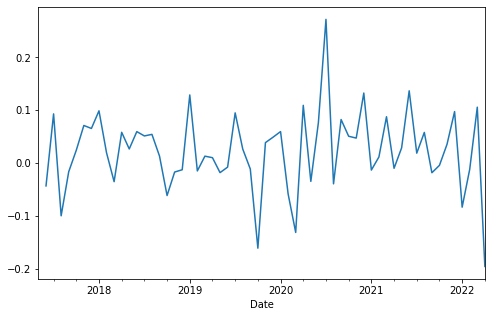

       Return_NIFTY  Return_INFY
count     59.000000    59.000000
mean       0.010262     0.022032
std        0.056379     0.076031
min       -0.262058    -0.195939
25%       -0.014396    -0.015830
50%        0.008299     0.024099
75%        0.045031     0.062425
max        0.134699     0.272002


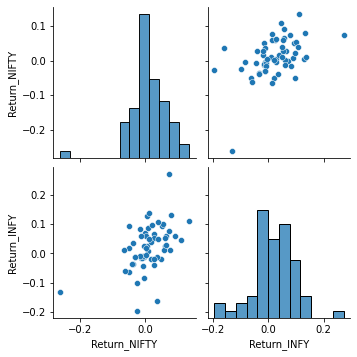

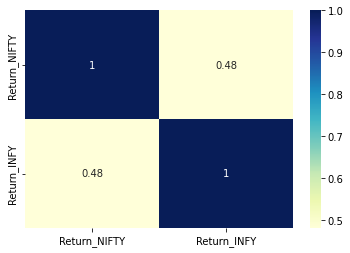

                            OLS Regression Results                            
Dep. Variable:            Return_INFY   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     17.28
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           0.000110
Time:                        15:28:45   Log-Likelihood:                 76.617
No. Observations:                  59   AIC:                            -149.2
Df Residuals:                      57   BIC:                            -145.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0154      0.009      1.727   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.0686189240824567

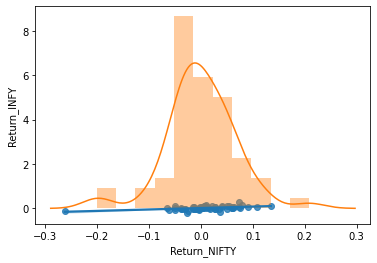

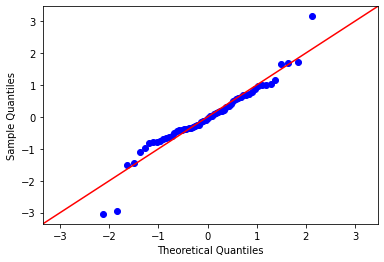

In [47]:
pipeline('INFY.NS', 0.75, 8.12)

In [48]:
ans = []

# Maruti Suzuki India Limited (MARUTI.NS)
From Yahoo finance -
1. EBIT = 6,324,000
2. Interest expenses = 227,000
3. Market Cap = 2.715T
4. D/E = 0.76


In [49]:
EBIT = 6324000
ie = 227000
ratio = EBIT / ie
ratio

27.859030837004404

For High cap firm and interest coverage ratio > 8.5, spread is 0.75%

Date
2017-05-01         NaN
2017-06-01   -0.007224
2017-07-01    0.050244
2017-08-01   -0.024422
2017-09-01   -0.014180
2017-10-01    0.059847
2017-11-01   -0.001922
2017-12-01    0.027007
2018-01-01    0.054516
2018-02-01   -0.050788
2018-03-01   -0.036201
2018-04-01    0.064361
2018-05-01    0.004597
2018-06-01    0.002858
2018-07-01    0.059804
2018-08-01    0.027240
2018-09-01   -0.064611
2018-10-01   -0.050530
2018-11-01    0.049623
2018-12-01   -0.003487
2019-01-01    0.005209
2019-02-01   -0.010794
2019-03-01    0.075309
2019-04-01    0.009231
2019-05-01    0.017338
2019-06-01   -0.008079
2019-07-01   -0.049792
2019-08-01   -0.003965
2019-09-01    0.035123
2019-10-01    0.037106
2019-11-01    0.016430
2019-12-01    0.011211
2020-01-01   -0.012937
2020-02-01   -0.061426
2020-03-01   -0.262058
2020-04-01    0.134699
2020-05-01   -0.039119
2020-06-01    0.074038
2020-07-01    0.074248
2020-08-01    0.026798
2020-09-01   -0.014613
2020-10-01    0.039812
2020-11-01    0.108402
2020-1

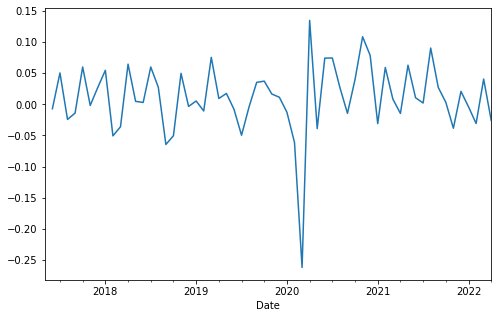

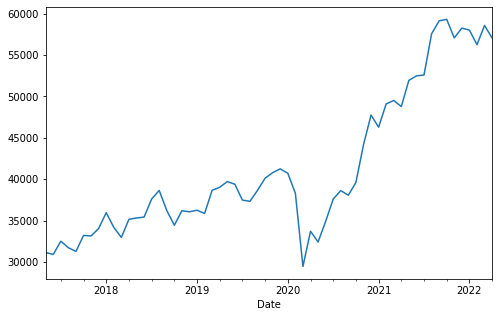

Date
2017-05-01         NaN
2017-06-01    0.000915
2017-07-01    0.071177
2017-08-01   -0.006440
2017-09-01    0.045406
2017-10-01    0.028792
2017-11-01    0.046152
2017-12-01    0.123510
2018-01-01   -0.022855
2018-02-01   -0.071788
2018-03-01    0.001146
2018-04-01   -0.005221
2018-05-01   -0.032016
2018-06-01    0.033224
2018-07-01    0.075796
2018-08-01   -0.045574
2018-09-01   -0.195810
2018-10-01   -0.104870
2018-11-01    0.146669
2018-12-01   -0.025928
2019-01-01   -0.117007
2019-02-01    0.027996
2019-03-01   -0.023279
2019-04-01   -0.000922
2019-05-01    0.030062
2019-06-01   -0.050023
2019-07-01   -0.177895
2019-08-01    0.112951
2019-09-01    0.106140
2019-10-01    0.118329
2019-11-01   -0.042363
2019-12-01    0.016799
2020-01-01   -0.063752
2020-02-01   -0.095613
2020-03-01   -0.381973
2020-04-01    0.222850
2020-05-01    0.045953
2020-06-01    0.039746
2020-07-01    0.070180
2020-08-01    0.088161
2020-09-01   -0.005254
2020-10-01    0.032347
2020-11-01    0.010092
2020-1

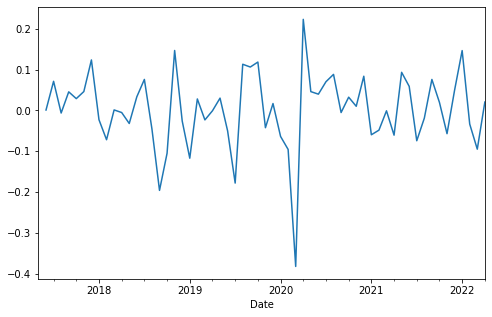

       Return_NIFTY  Return_INFY
count     59.000000    59.000000
mean       0.010262     0.002113
std        0.056379     0.093515
min       -0.262058    -0.381973
25%       -0.014396    -0.046987
50%        0.008299     0.001146
75%        0.045031     0.054178
max        0.134699     0.222850


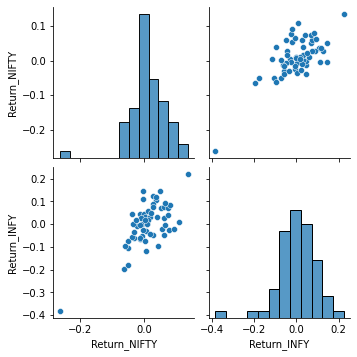

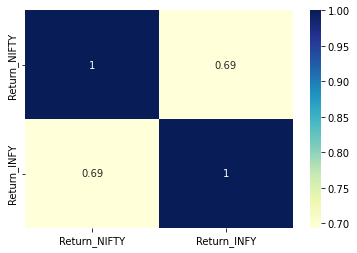

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


                            OLS Regression Results                            
Dep. Variable:            Return_INFY   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     52.79
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           1.15e-09
Time:                        15:28:49   Log-Likelihood:                 75.932
No. Observations:                  59   AIC:                            -147.9
Df Residuals:                      57   BIC:                            -143.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0097      0.009     -1.077   

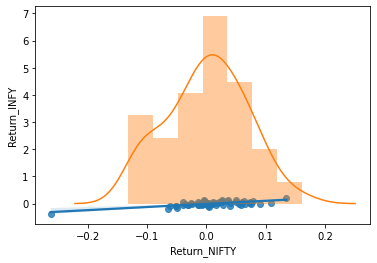

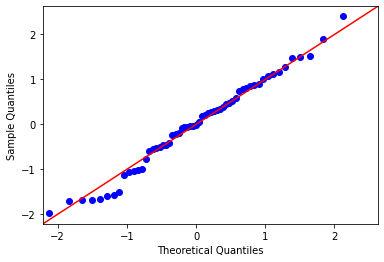

In [50]:
ans.append(pipeline("MARUTI.NS", 0.75, 0.76))

# Tata Motors Limited (TATAMOTORS.NS)
From Yahoo finance -
1. EBIT = 34,145,300
2. Interest expenses = 93,100,300
3. Market Cap = 1.519T
4. D/E = 4.6771


In [51]:
EBIT = 34145300
ie = 93100300
ratio = EBIT / ie
ratio

0.3667582166759935

For High cap firm and interest coverage ratio between 0.2-0.65, spread is 12.70%

Date
2017-05-01         NaN
2017-06-01   -0.007224
2017-07-01    0.050244
2017-08-01   -0.024422
2017-09-01   -0.014180
2017-10-01    0.059847
2017-11-01   -0.001922
2017-12-01    0.027007
2018-01-01    0.054516
2018-02-01   -0.050788
2018-03-01   -0.036201
2018-04-01    0.064361
2018-05-01    0.004597
2018-06-01    0.002858
2018-07-01    0.059804
2018-08-01    0.027240
2018-09-01   -0.064611
2018-10-01   -0.050530
2018-11-01    0.049623
2018-12-01   -0.003487
2019-01-01    0.005209
2019-02-01   -0.010794
2019-03-01    0.075309
2019-04-01    0.009231
2019-05-01    0.017338
2019-06-01   -0.008079
2019-07-01   -0.049792
2019-08-01   -0.003965
2019-09-01    0.035123
2019-10-01    0.037106
2019-11-01    0.016430
2019-12-01    0.011211
2020-01-01   -0.012937
2020-02-01   -0.061426
2020-03-01   -0.262058
2020-04-01    0.134699
2020-05-01   -0.039119
2020-06-01    0.074038
2020-07-01    0.074248
2020-08-01    0.026798
2020-09-01   -0.014613
2020-10-01    0.039812
2020-11-01    0.108402
2020-1

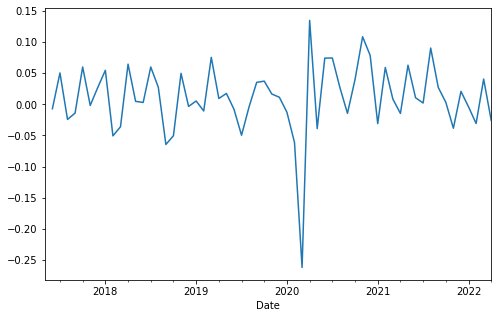

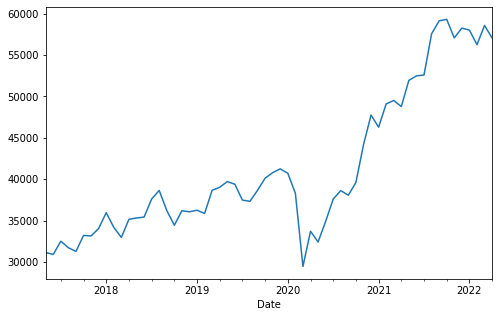

Date
2017-05-01         NaN
2017-06-01   -0.096035
2017-07-01    0.027477
2017-08-01   -0.166124
2017-09-01    0.064157
2017-10-01    0.064850
2017-11-01   -0.058271
2017-12-01    0.066292
2018-01-01   -0.077865
2018-02-01   -0.076981
2018-03-01   -0.123731
2018-04-01    0.040620
2018-05-01   -0.186443
2018-06-01   -0.047853
2018-07-01   -0.019498
2018-08-01    0.012792
2018-09-01   -0.178814
2018-10-01   -0.222362
2018-11-01   -0.040741
2018-12-01    0.004352
2019-01-01    0.048045
2019-02-01   -0.020913
2019-03-01   -0.018198
2019-04-01    0.206886
2019-05-01   -0.216400
2019-06-01   -0.059991
2019-07-01   -0.181276
2019-08-01   -0.150103
2019-09-01    0.006406
2019-10-01    0.414084
2019-11-01   -0.095592
2019-12-01    0.136661
2020-01-01   -0.047279
2020-02-01   -0.314463
2020-03-01   -0.596041
2020-04-01    0.271900
2020-05-01   -0.069376
2020-06-01    0.121607
2020-07-01    0.063106
2020-08-01    0.313621
2020-09-01   -0.071640
2020-10-01   -0.004888
2020-11-01    0.307185
2020-1

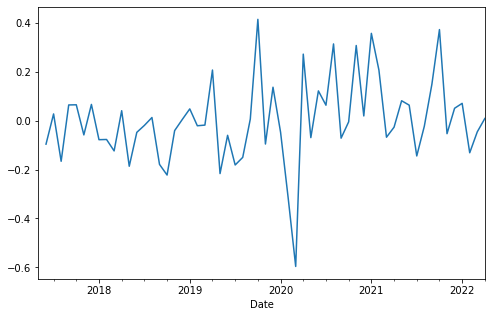

       Return_NIFTY  Return_INFY
count     59.000000    59.000000
mean       0.010262    -0.001431
std        0.056379     0.171412
min       -0.262058    -0.596041
25%       -0.014396    -0.077423
50%        0.008299    -0.019498
75%        0.045031     0.064503
max        0.134699     0.414084


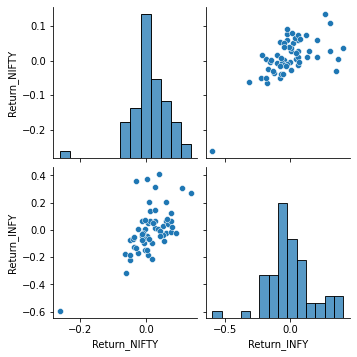

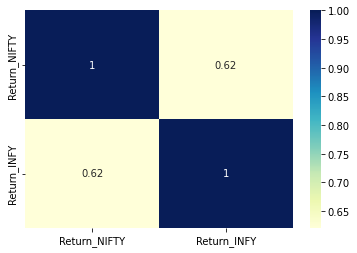

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:            Return_INFY   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     35.73
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           1.56e-07
Time:                        15:28:55   Log-Likelihood:                 35.201
No. Observations:                  59   AIC:                            -66.40
Df Residuals:                      57   BIC:                            -62.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0208      0.018     -1.159   

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    5.900000e+01
mean     9.173453e-18
std      1.343887e-01
min     -2.283251e-01
25%     -8.994938e-02
50%     -2.730209e-02
75%      3.995568e-02
max      4.365217e-01
dtype: float64
{'Test Statistic': 0.3958593671255033, 'Test Statistic p-value': 0.8204275406512961, 'F-Statistic': 0.18913445636802526, 'F-Test p-value': 0.8282017163076463}
NormaltestResult(statistic=20.27928764255236, pvalue=3.948286327723287e-05)
this
Market returns = 15.96919898535675
rf = 0.07395904761904762
Coe = 23.576239853929053
Cod = 20.095904761904762
Wacc = 16.569931298613312


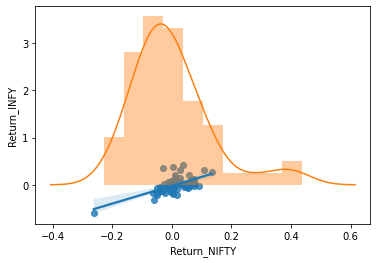

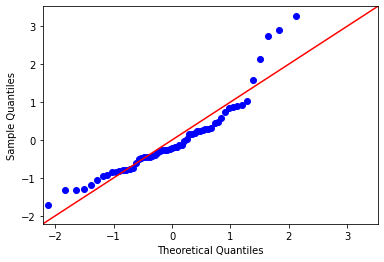

In [52]:
ans.append(pipeline("TATAMOTORS.NS", 12.7, 4.6771))

# Mahindra & Mahindra Limited (M&M.NS)
From Yahoo finance -
1. EBIT = 182,337,900
2. Interest expenses = 49,304,000
3. Market Cap = 1.566T
4. D/E = 1.3748


In [53]:
EBIT = 182337900
ie = 49304000
ratio = EBIT / ie
ratio

3.6982374655200387

For High cap firm and interest coverage ratio between 3- 4.25, spread is 2.00%

Date
2017-05-01         NaN
2017-06-01   -0.007224
2017-07-01    0.050244
2017-08-01   -0.024422
2017-09-01   -0.014180
2017-10-01    0.059847
2017-11-01   -0.001922
2017-12-01    0.027007
2018-01-01    0.054516
2018-02-01   -0.050788
2018-03-01   -0.036201
2018-04-01    0.064361
2018-05-01    0.004597
2018-06-01    0.002858
2018-07-01    0.059804
2018-08-01    0.027240
2018-09-01   -0.064611
2018-10-01   -0.050530
2018-11-01    0.049623
2018-12-01   -0.003487
2019-01-01    0.005209
2019-02-01   -0.010794
2019-03-01    0.075309
2019-04-01    0.009231
2019-05-01    0.017338
2019-06-01   -0.008079
2019-07-01   -0.049792
2019-08-01   -0.003965
2019-09-01    0.035123
2019-10-01    0.037106
2019-11-01    0.016430
2019-12-01    0.011211
2020-01-01   -0.012937
2020-02-01   -0.061426
2020-03-01   -0.262058
2020-04-01    0.134699
2020-05-01   -0.039119
2020-06-01    0.074038
2020-07-01    0.074248
2020-08-01    0.026798
2020-09-01   -0.014613
2020-10-01    0.039812
2020-11-01    0.108402
2020-1

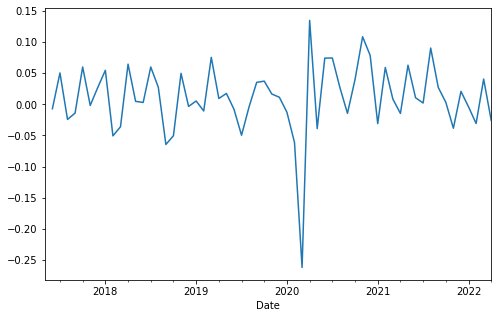

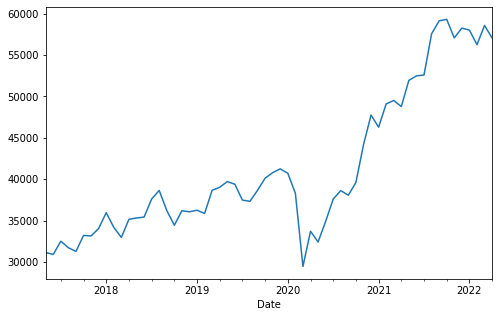

Date
2017-05-01         NaN
2017-06-01   -0.049440
2017-07-01    0.039760
2017-08-01   -0.033094
2017-09-01   -0.069708
2017-10-01    0.069708
2017-11-01    0.044895
2017-12-01    0.065791
2018-01-01    0.015785
2018-02-01   -0.046542
2018-03-01    0.014381
2018-04-01    0.167116
2018-05-01    0.055296
2018-06-01   -0.027739
2018-07-01    0.041726
2018-08-01    0.038965
2018-09-01   -0.114402
2018-10-01   -0.116920
2018-11-01    0.032055
2018-12-01    0.016241
2019-01-01   -0.167246
2019-02-01   -0.051522
2019-03-01    0.042437
2019-04-01   -0.043367
2019-05-01    0.002708
2019-06-01    0.012746
2019-07-01   -0.175251
2019-08-01   -0.025458
2019-09-01    0.034113
2019-10-01    0.102899
2019-11-01   -0.133708
2019-12-01    0.001883
2020-01-01    0.064827
2020-02-01   -0.215831
2020-03-01   -0.472479
2020-04-01    0.252094
2020-05-01    0.174037
2020-06-01    0.157338
2020-07-01    0.171840
2020-08-01    0.005022
2020-09-01    0.001646
2020-10-01   -0.023131
2020-11-01    0.195146
2020-1

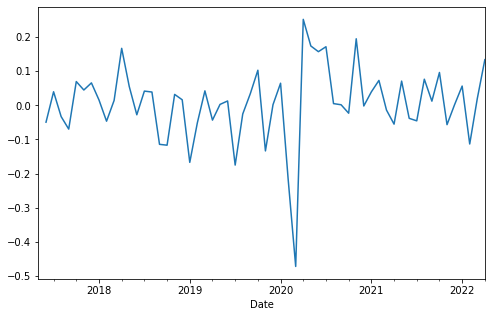

       Return_NIFTY  Return_INFY
count     59.000000    59.000000
mean       0.010262     0.005262
std        0.056379     0.110880
min       -0.262058    -0.472479
25%       -0.014396    -0.044438
50%        0.008299     0.012746
75%        0.045031     0.060657
max        0.134699     0.252094


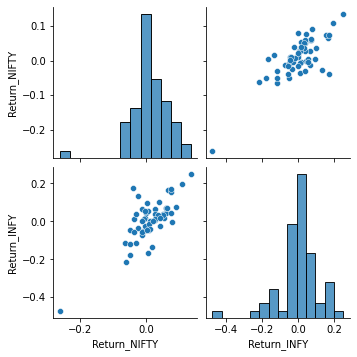

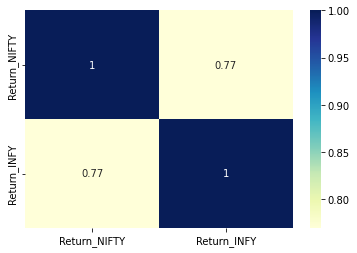

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:            Return_INFY   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     82.76
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           1.07e-12
Time:                        15:29:03   Log-Likelihood:                 73.003
No. Observations:                  59   AIC:                            -142.0
Df Residuals:                      57   BIC:                            -137.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0103      0.009     -1.086   

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    5.900000e+01
mean     2.352167e-18
std      7.081119e-02
min     -1.648610e-01
25%     -3.811046e-02
50%     -1.326321e-02
75%      4.097383e-02
max      2.435069e-01
dtype: float64
{'Test Statistic': 2.049915556793617, 'Test Statistic p-value': 0.35881161468775175, 'F-Statistic': 1.0078586564250158, 'F-Test p-value': 0.3715233382645008}
NormaltestResult(statistic=9.825096544652695, pvalue=0.00735372514039056)
this
Market returns = 15.96919898535675
rf = 0.07395904761904762
Coe = 20.37061883516045
Cod = 9.395904761904763
Wacc = 12.657375878036234


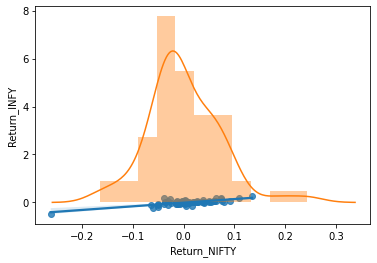

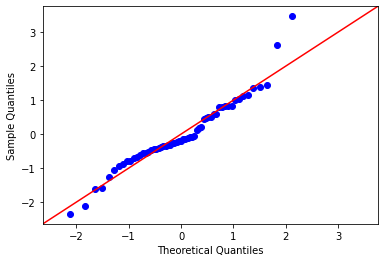

In [54]:
ans.append(pipeline("M&M.NS", 2, 1.3748))

# Eicher Motors Limited (EICHERMOT.NS)
From Yahoo finance -
1. EBIT = 164,500
2. Interest expenses = 18,148,400
3. Market Cap = .927159T
4. D/E = 1.27


In [55]:
EBIT = 18148400
ie = 164500
ratio = EBIT / ie
ratio

110.32462006079027

For High cap firm and interest coverage ratio > 8.5, spread is 0.75%

Date
2017-05-01         NaN
2017-06-01   -0.007224
2017-07-01    0.050244
2017-08-01   -0.024422
2017-09-01   -0.014180
2017-10-01    0.059847
2017-11-01   -0.001922
2017-12-01    0.027007
2018-01-01    0.054516
2018-02-01   -0.050788
2018-03-01   -0.036201
2018-04-01    0.064361
2018-05-01    0.004597
2018-06-01    0.002858
2018-07-01    0.059804
2018-08-01    0.027240
2018-09-01   -0.064611
2018-10-01   -0.050530
2018-11-01    0.049623
2018-12-01   -0.003487
2019-01-01    0.005209
2019-02-01   -0.010794
2019-03-01    0.075309
2019-04-01    0.009231
2019-05-01    0.017338
2019-06-01   -0.008079
2019-07-01   -0.049792
2019-08-01   -0.003965
2019-09-01    0.035123
2019-10-01    0.037106
2019-11-01    0.016430
2019-12-01    0.011211
2020-01-01   -0.012937
2020-02-01   -0.061426
2020-03-01   -0.262058
2020-04-01    0.134699
2020-05-01   -0.039119
2020-06-01    0.074038
2020-07-01    0.074248
2020-08-01    0.026798
2020-09-01   -0.014613
2020-10-01    0.039812
2020-11-01    0.108402
2020-1

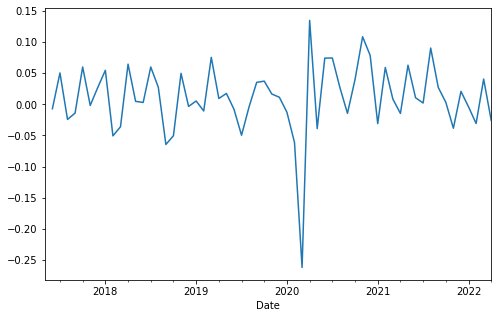

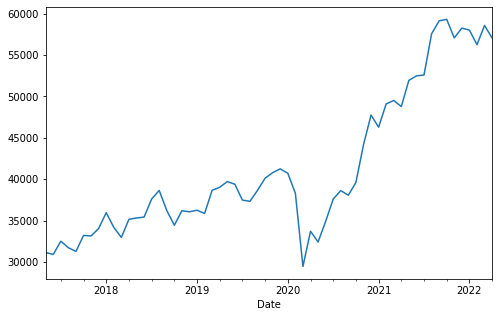

Date
2017-05-01         NaN
2017-06-01   -0.050326
2017-07-01    0.106606
2017-08-01    0.047934
2017-09-01   -0.007582
2017-10-01    0.032159
2017-11-01   -0.073673
2017-12-01    0.013164
2018-01-01   -0.119492
2018-02-01    0.018916
2018-03-01    0.033506
2018-04-01    0.094627
2018-05-01   -0.013166
2018-06-01   -0.073814
2018-07-01   -0.028089
2018-08-01    0.009352
2018-09-01   -0.144549
2018-10-01   -0.100880
2018-11-01    0.068094
2018-12-01   -0.010607
2019-01-01   -0.197614
2019-02-01    0.044424
2019-03-01    0.033583
2019-04-01   -0.008769
2019-05-01   -0.020863
2019-06-01   -0.041399
2019-07-01   -0.157609
2019-08-01    0.081218
2019-09-01    0.088629
2019-10-01    0.237966
2019-11-01    0.015117
2019-12-01   -0.016132
2020-01-01   -0.104099
2020-02-01   -0.200549
2020-03-01   -0.237245
2020-04-01    0.123955
2020-05-01    0.117904
2020-06-01    0.102481
2020-07-01    0.118394
2020-08-01    0.013538
2020-09-01    0.051609
2020-10-01   -0.054673
2020-11-01    0.194999
2020-1

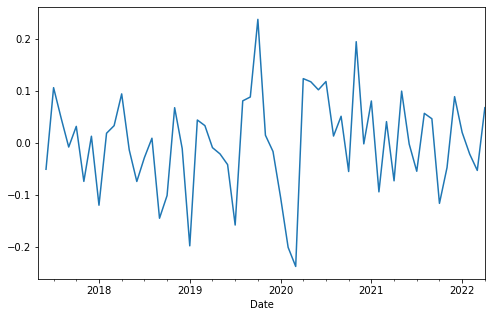

       Return_NIFTY  Return_INFY
count     59.000000    59.000000
mean       0.010262     0.000514
std        0.056379     0.093616
min       -0.262058    -0.237245
25%       -0.014396    -0.053385
50%        0.008299     0.009352
75%        0.045031     0.062656
max        0.134699     0.237966


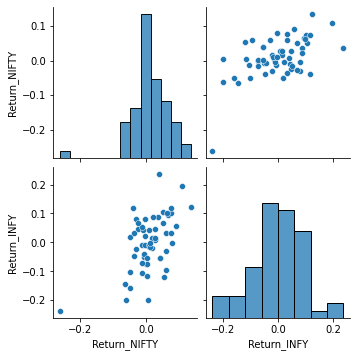

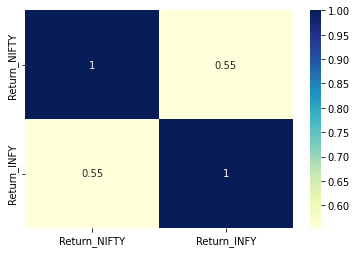

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


                            OLS Regression Results                            
Dep. Variable:            Return_INFY   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.294
Method:                 Least Squares   F-statistic:                     25.17
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           5.46e-06
Time:                        15:29:09   Log-Likelihood:                 67.320
No. Observations:                  59   AIC:                            -130.6
Df Residuals:                      57   BIC:                            -126.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0089      0.010     -0.856   

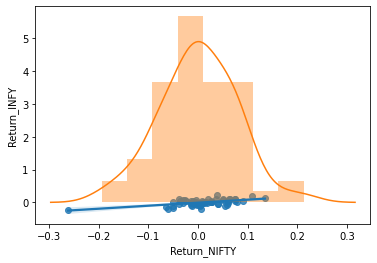

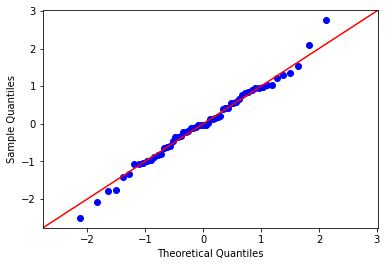

In [56]:
ans.append(pipeline("EICHERMOT.NS", 0.75, 1.27))

# Hero MotoCorp Limited (HEROMOTOCO.NS)
From Yahoo finance -
1. EBIT = 31,112,100
2. Interest expenses = 531,000
3. Market Cap = 0.544167T
4. D/E = 4.39


In [57]:
EBIT = 31112100
ie = 531000
ratio = EBIT / ie
ratio

58.59152542372881

For High cap firm and interest coverage ratio > 8.5, spread is 0.75%

Date
2017-05-01         NaN
2017-06-01   -0.007224
2017-07-01    0.050244
2017-08-01   -0.024422
2017-09-01   -0.014180
2017-10-01    0.059847
2017-11-01   -0.001922
2017-12-01    0.027007
2018-01-01    0.054516
2018-02-01   -0.050788
2018-03-01   -0.036201
2018-04-01    0.064361
2018-05-01    0.004597
2018-06-01    0.002858
2018-07-01    0.059804
2018-08-01    0.027240
2018-09-01   -0.064611
2018-10-01   -0.050530
2018-11-01    0.049623
2018-12-01   -0.003487
2019-01-01    0.005209
2019-02-01   -0.010794
2019-03-01    0.075309
2019-04-01    0.009231
2019-05-01    0.017338
2019-06-01   -0.008079
2019-07-01   -0.049792
2019-08-01   -0.003965
2019-09-01    0.035123
2019-10-01    0.037106
2019-11-01    0.016430
2019-12-01    0.011211
2020-01-01   -0.012937
2020-02-01   -0.061426
2020-03-01   -0.262058
2020-04-01    0.134699
2020-05-01   -0.039119
2020-06-01    0.074038
2020-07-01    0.074248
2020-08-01    0.026798
2020-09-01   -0.014613
2020-10-01    0.039812
2020-11-01    0.108402
2020-1

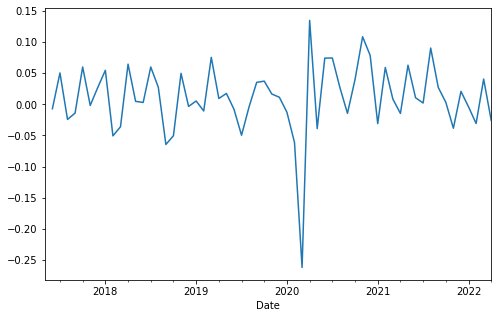

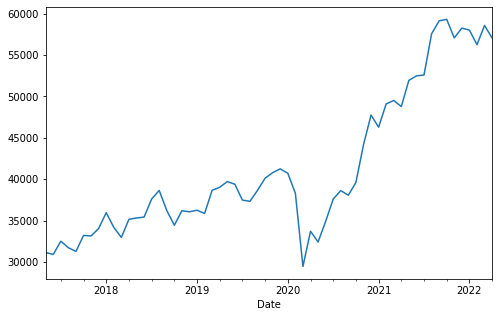

Date
2017-05-01         NaN
2017-06-01   -0.011844
2017-07-01   -0.004291
2017-08-01    0.088767
2017-09-01   -0.056788
2017-10-01    0.019766
2017-11-01   -0.057809
2017-12-01    0.040848
2018-01-01   -0.025066
2018-02-01   -0.026002
2018-03-01    0.000313
2018-04-01    0.052094
2018-05-01   -0.051501
2018-06-01   -0.020347
2018-07-01   -0.052923
2018-08-01    0.010184
2018-09-01   -0.103713
2018-10-01   -0.060029
2018-11-01    0.100763
2018-12-01    0.015927
2019-01-01   -0.171910
2019-02-01    0.005399
2019-03-01   -0.010041
2019-04-01   -0.016308
2019-05-01    0.064890
2019-06-01   -0.037539
2019-07-01   -0.091363
2019-08-01    0.113003
2019-09-01    0.050306
2019-10-01   -0.000203
2019-11-01   -0.105455
2019-12-01    0.003896
2020-01-01    0.023783
2020-02-01   -0.198338
2020-03-01   -0.222940
2020-04-01    0.305423
2020-05-01    0.085817
2020-06-01    0.075875
2020-07-01    0.049614
2020-08-01    0.125150
2020-09-01    0.045918
2020-10-01   -0.116997
2020-11-01    0.104705
2020-1

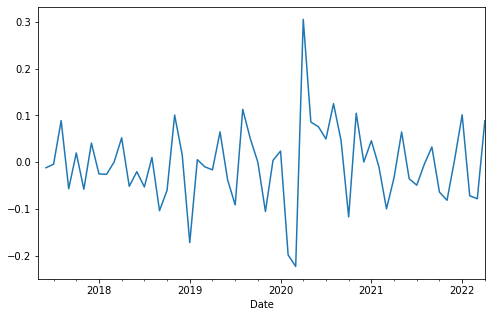

       Return_NIFTY  Return_INFY
count     59.000000    59.000000
mean       0.010262    -0.004194
std        0.056379     0.085492
min       -0.262058    -0.222940
25%       -0.014396    -0.054855
50%        0.008299    -0.004264
75%        0.045031     0.047766
max        0.134699     0.305423


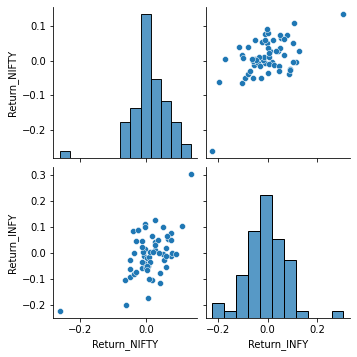

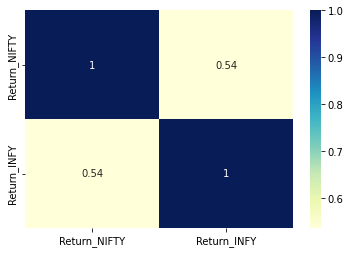

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


                            OLS Regression Results                            
Dep. Variable:            Return_INFY   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     22.99
Date:                Sun, 20 Nov 2022   Prob (F-statistic):           1.21e-05
Time:                        15:29:13   Log-Likelihood:                 71.883
No. Observations:                  59   AIC:                            -139.8
Df Residuals:                      57   BIC:                            -135.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0125      0.010     -1.301   

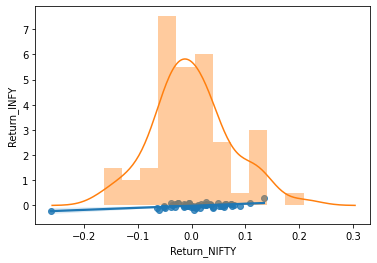

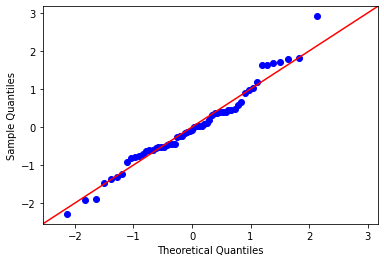

In [58]:
ans.append(pipeline("HEROMOTOCO.NS", 0.75, 4.39))

# Conclusion Top Down approach

##The WACC for Each of the companies are - 
### Maruti Suzuki India Limited - 12.44% 

### Tata Motors Limited - 16.57%

### Mahindra & Mahindra Limited - 12.65%

### Eicher Motors Limited - 10.15%

### Hero MotoCorp Limited - 7.64%

As we can see the highest WACC is of TATA MOTORS , whereas the least is of Hero Motocorp 

In [60]:
ans

[0.12442923736366152,
 0.1656993129861331,
 0.12657375878036234,
 0.10146882600309705,
 0.0764112799420113]

# BOTTOM UP APPROACH
The same companies beta has been used as "comparable" company betas , owing to the fact that though of the same sector each are fundamentally different companies, competing in different segments. 

For eg - Hero MotoCorp in 2 wheelers , Eicher Motors primarily in LCV (Large Commercial Vehicles) and TATA Motors in all 4 wheelers etc.

Companies like TATA Motors have no similar companies anywhere near its size , similarly other companies either have no companies their size that are similar to them or taking companies similar to them is fundamentally very very different to rest of the 4 companies.

Therefore the same 5 companies Beta levering and unlevering has been done, considering them to be representatives of the whole breadth of automobile sector and also representatives of themselves.


In [69]:
# In each list , the elements are for companies (in order)- Maruti, TATA, M&M , Eicher, Hero

beta_levered=[1.1501,1.8873,1.5134,0.919,0.8129]    # levered Beta of comparable companies (taken from above)
debt_equity=[0.76,4.6771,1.3748,1.27,4.39]   # debt equity ratio of each company (taken from above) 
Rf= 0.07395904761904762  # Risk Free rate (taken from above)
beta_unlevered=[]  # unlevered beta list
beta_re_levered=[]  # relevered beta list 
tax=0.25  # corporate tax rate (taken from above)
W_avg_beta_unlevered=0   # weighted average beta 
mkt_cap=[2.715,1.519,1.566,0.927159, 0.544167]  # market caps of companies (taken from above)
Rc=[]   # cost of Equity
Rm=0.1596919898535675 # Market return (taken from above)
Rb=[0.08145904761904763,0.20095904761904762,0.09395904761904763,0.08145904761904763, 0.08145904761904763]  # cost of debt (taken from above)
wc=[] # weight of equity
wb=[]  # weight of debt
wacc=[] 

# Calculating Weights of equity, debt
for i in range(5):
  wc.append((debt_equity[i]+1)**(-1))
  wb.append(1-wc[i])

# Calculation unlevered beta

for i in range(5):
  beta_unlevered.append( beta_levered[i] /(1+(1-tax)*debt_equity[i]))

# Calculation of Weighted average unlevered beta
num=0   # numerator of weighted average = market cap weighted sum of unlevered betas
sum_mkt_cap=0
for i in range(5):

  num+=mkt_cap[i]*beta_unlevered[i]
  sum_mkt_cap+=mkt_cap[i]

W_avg_beta_unlevered=num/sum_mkt_cap    

# Calculation of re-levered beta for each company
for i in range(5):
  beta_re_levered.append(W_avg_beta_unlevered*(1+(1-tax)*debt_equity[i]))

  
# Calculation of cost of equity 

for i in range(5):
  Rc.append(Rf+beta_re_levered[i]*(Rm-Rf))

# Calculation of WACC using formula 
for i in range(5):
  wacc.append(Rb[i]*(1-tax)*wb[i]+Rc[i]*wc[i])

wacc


[0.11395730762990602,
 0.1777467987484566,
 0.11561439637094476,
 0.11068538453363143,
 0.1041493940988164]

# Conclusion Top Down approach
##The WACC for Each of the companies are - 

### Maruti Suzuki India Limited - 11.4% 

### Tata Motors Limited - 17.78%

### Mahindra & Mahindra Limited - 11.56%

### Eicher Motors Limited - 10.41%

### Hero MotoCorp Limited - 7.64%

As we can see the highest WACC is of TATA MOTORS , whereas the least is of Hero Motocorp. 

The results of bottom up and top down approach are similar but for Maruti and Mahindra interchanging their ranking. 